In [2]:
# Import helpful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

# Confoguration to show all the rows 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None) # Shows all the columns without truncate 
pd.set_option('display.width', 800) # set the maximun width of the lines

In [3]:
# input data
url = 'https://raw.githubusercontent.com/julaux/Data-Analysis/refs/heads/main/Gym%20members%20EDA/Input/gym_members_exercise.csv'
data = pd.read_csv(url)

This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive analysis of fitness patterns, athlete progression, and health trends.

Key Features:

+ Age: Age of the gym member.
+ Gender: Gender of the gym member (Male or Female).
+ Weight (kg): Member’s weight in kilograms.
+ Height (m): Member’s height in meters.
+ Max_BPM: Maximum heart rate (beats per minute) during workout sessions.
+ Avg_BPM: Average heart rate during workout sessions.
+ Resting_BPM: Heart rate at rest before workout.
+ Session_Duration (hours): Duration of each workout session in hours.
+ Calories_Burned: Total calories burned during each session.
+ Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
+ Fat_Percentage: Body fat percentage of the member.
+ Water_Intake (liters): Daily water intake during workouts.
+ Workout_Frequency (days/week): Number of workout sessions per week.
+ Experience_Level: Level of experience, from beginner (1) to expert (3).
+ BMI: Body Mass Index, calculated from height and weight.

Check the data for no issues

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

We have 973 instances, fitheen (15) variables which are two categorical and thirteen numerical variables with any Na's in the columns

Check the indices if any comes up with NaN

In [65]:
data.isnull().values.any()

False

Rename columns with spaces: Weight (kg), Height (m), Session_Duration (hours), Workout_Frequency_(days/week)
This, for avoiding some errors

Select the columns with caterogical and numerical variables

In [4]:
data['Session_Duration (hours)'] = data['Session_Duration (hours)']*60 # convert hours to minutes

data = data.rename(columns={'Weight (kg)':'Weight_kg', 'Height (m)':'Height_m', 'Session_Duration (hours)':'Session_Duration_minutes', 'Water_Intake (liters)':'Water_Intake_liters', 'Workout_Frequency (days/week)':'Workout_Frequency_days_per_week'})

categorical = [col for col in data.columns if data[col].dtype == 'object']
numerical = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

# Print the list of numerical and categorical variables
print(f'Categorical variables: {categorical}')
print(f'\nnumerical variables: {numerical}')
print('\nClases of experience level: ', data['Experience_Level'].nunique(), " and their classes: ", data['Experience_Level'].unique())
print('\nClases of frequency days per week: ', data['Workout_Frequency_days_per_week'].nunique(), " and their classes: ", data['Workout_Frequency_days_per_week'].unique())

Categorical variables: ['Gender', 'Workout_Type']

numerical variables: ['Age', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration_minutes', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake_liters', 'Workout_Frequency_days_per_week', 'Experience_Level', 'BMI']

Clases of experience level:  3  and their classes:  [3 2 1]

Clases of frequency days per week:  4  and their classes:  [4 3 5 2]


Basics stats exploration for the numerical variables

In [67]:
description = data.describe().T
description.sort_index()

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
BMI,973.0,24.912127,6.660879,12.32,20.11,24.16,28.56,49.84
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Experience_Level,973.0,1.809866,0.739693,1.00,1.00,2.00,2.00,3.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Height_m,973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration_minutes,973.0,75.385406,20.582009,30.00,62.40,75.60,87.60,120.00


## NOTES
+ The average age of these data is approximately 38 years.
+ The average weight is 74 kg.
+ The average height for both men and women is 1.72 m.
+ For both men and women, the average session lenght is one (1) hour and fifteen (15) minutes; anyone last training more than two (2) hours. 
+ The dataset contains three types of levels according to the experience, from one (1) to three (3).

Below, we see the distribution between women and men and the level of experience, with their respective quantity between men and women.

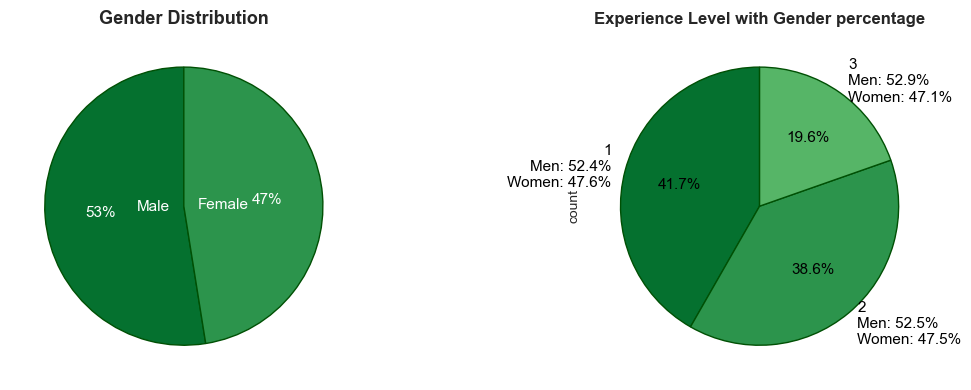

In [5]:
# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1,1]})

# Titles
axes[0].set_title('Gender Distribution', fontsize=13, fontweight='bold')
axes[1].set_title('Experience Level with Gender percentage', fontsize=12, fontweight='bold')

# Graph for gender
data['Gender'].value_counts().plot.pie(
    labeldistance=0.1,
    ax = axes[0],
    autopct = '%1.f%%',
    startangle = 90,
    colors = sns.color_palette('Greens_r'),
    wedgeprops = {'edgecolor':'#005004'},
    textprops = {'fontsize':11, 'color':'white'},
    label=''
)

# Proportions for Experience_Levesl and Gender
exp_gender_counts = data.groupby(['Experience_Level', 'Gender']).size().unstack(fill_value=0)

# Percentage of gender into evert class for Experience level
gender_percentage = exp_gender_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Labels
labels = []
for exp_level in exp_gender_counts.index:
    male_percentage = gender_percentage.loc[exp_level, 'Male']
    female_percentage = gender_percentage.loc[exp_level, 'Female']
    label = f"{exp_level}\nMen: {male_percentage:.1f}%\nWomen: {female_percentage:.1f}%"
    labels.append(label)

data['Experience_Level'].value_counts().plot.pie(
    ax=axes[1],
    labels=labels,
    autopct = '%1.1f%%',
    startangle = 90,
    colors=sns.color_palette('Greens_r'),
    wedgeprops={'edgecolor': '#005004'},
    textprops={'fontsize':11, 'color':'black'},
    labeldistance=1.1 # Move labels away from the center
)

plt.tight_layout()
plt.show()

## NOTES FROM PIE PLOT

+ Majority are men even if it is experience 1 or 3, men 53% and women 47%, this indicates a fairly balanced gender distribution.
+ Experience 3 means a significantly lower proportion, this could mean that along the experience is more reduced the people who try to maintain a constant sporting life.
+ It is notorious that experience 1 shows a big proportion, this could be that many people start sporting life but along the time is reduced the quantity of people who maintain constant.

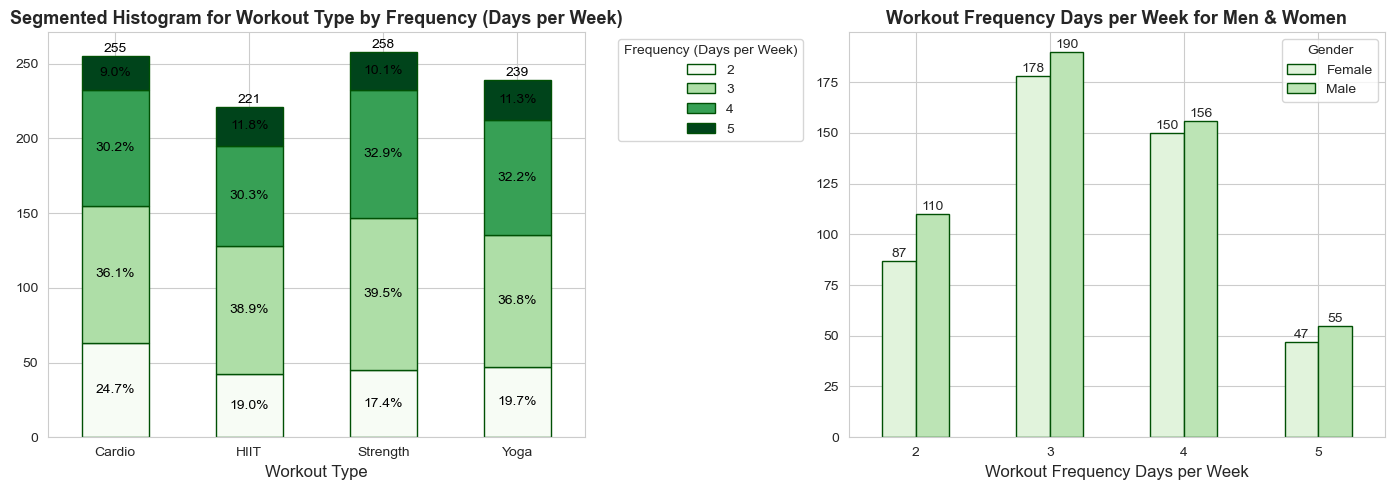

In [6]:
# Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [1, 1]})

# Titles
axes[0].set_title('Segmented Histogram for Workout Type by Frequency (Days per Week)', fontsize=13, fontweight='bold')
axes[1].set_title('Workout Frequency Days per Week for Men & Women', fontsize=13, fontweight='bold')

# Group the data to calculate the frequency of exercise in training days for each type of training.
data_grouped = pd.crosstab(data['Workout_Type'], data['Workout_Frequency_days_per_week'])

# Group Workout_Frequency_days_per_week with Gender
freqdays_gender_counts = data.groupby(['Workout_Frequency_days_per_week', 'Gender']).size().unstack(fill_value=0)

# Plot for Workout Type by Frequency (Stacked Bar Chart)
ax = data_grouped.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    colormap='Greens',
    edgecolor='#005004'
)

# Calculate and add percentage labels for each segment
for i, workout_type in enumerate(data_grouped.index):
    total = data_grouped.loc[workout_type].sum()  # Total for this specific Workout_Type
    for j, freq in enumerate(data_grouped.columns):
        value = data_grouped.loc[workout_type, freq]
        if value > 0:  # Only add labels for non-zero values
            percentage = (value / total) * 100
            ax.text(
                i,  # x position (bar index)
                data_grouped.iloc[i, :j].sum() + value / 2,  # y position (sum of previous segments + half the current one)
                f'{percentage:.1f}%',  # Text with percentage
                ha='center', va='center', fontsize=10, color='black'
            )

# Label of total for each type of Workout type
for i, workout_type in enumerate(data_grouped.index):
    total = data_grouped.loc[workout_type].sum()  # Total para cada Workout_Type
    ax.text(
        i,  # Posición x (índice de la barra)
        total + 0.5,  # Posición y justo por encima de la barra
        f'{total}',  # Texto con el total
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Move the legend for the first graph
axes[0].legend(title='Frequency (Days per Week)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for Workout Frequency by Gender (Stacked Bar Chart)
ax2 = freqdays_gender_counts.plot(
    kind='bar',
    ax=axes[1],
    color=sns.color_palette('Greens'),
    edgecolor='#005004'
)

# Labels on top of each bar in the second plot (Workout frequency days per week for Men & Women)
for p in ax2.patches:
    ax2.annotate(
        f'{int(p.get_height())}',  # Label text (height of the bar)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position (center of the bar)
        ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10
    )

# Adjust labels and title for the second subplot
axes[0].tick_params(axis='x', labelrotation=0)
axes[0].set_xlabel('Workout Type', fontsize=12)

axes[1].set_xlabel('Workout Frequency Days per Week', fontsize=12)
axes[1].tick_params(axis='x', labelrotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

# NOTES FROM BAR CHARTS

Workout type graph
+ The preferred type of workout is strength, with the most often 3 days a week.
+ The second one preferred type of workout is cardio; people like training between 3 to 4 days a week.
+ Between 36% and 39% of people do cardio and strength training 3 days a week.

Workout frequency days per week graph
+ The majority of men like to  train 3 days a week, in this case 190 of the 973 people in this study.
+ For a training frequency of 2 days per week of training, there is a large difference between men and women (23).
+ 10% of people maintain a training intensity of 5 days per week. 

c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

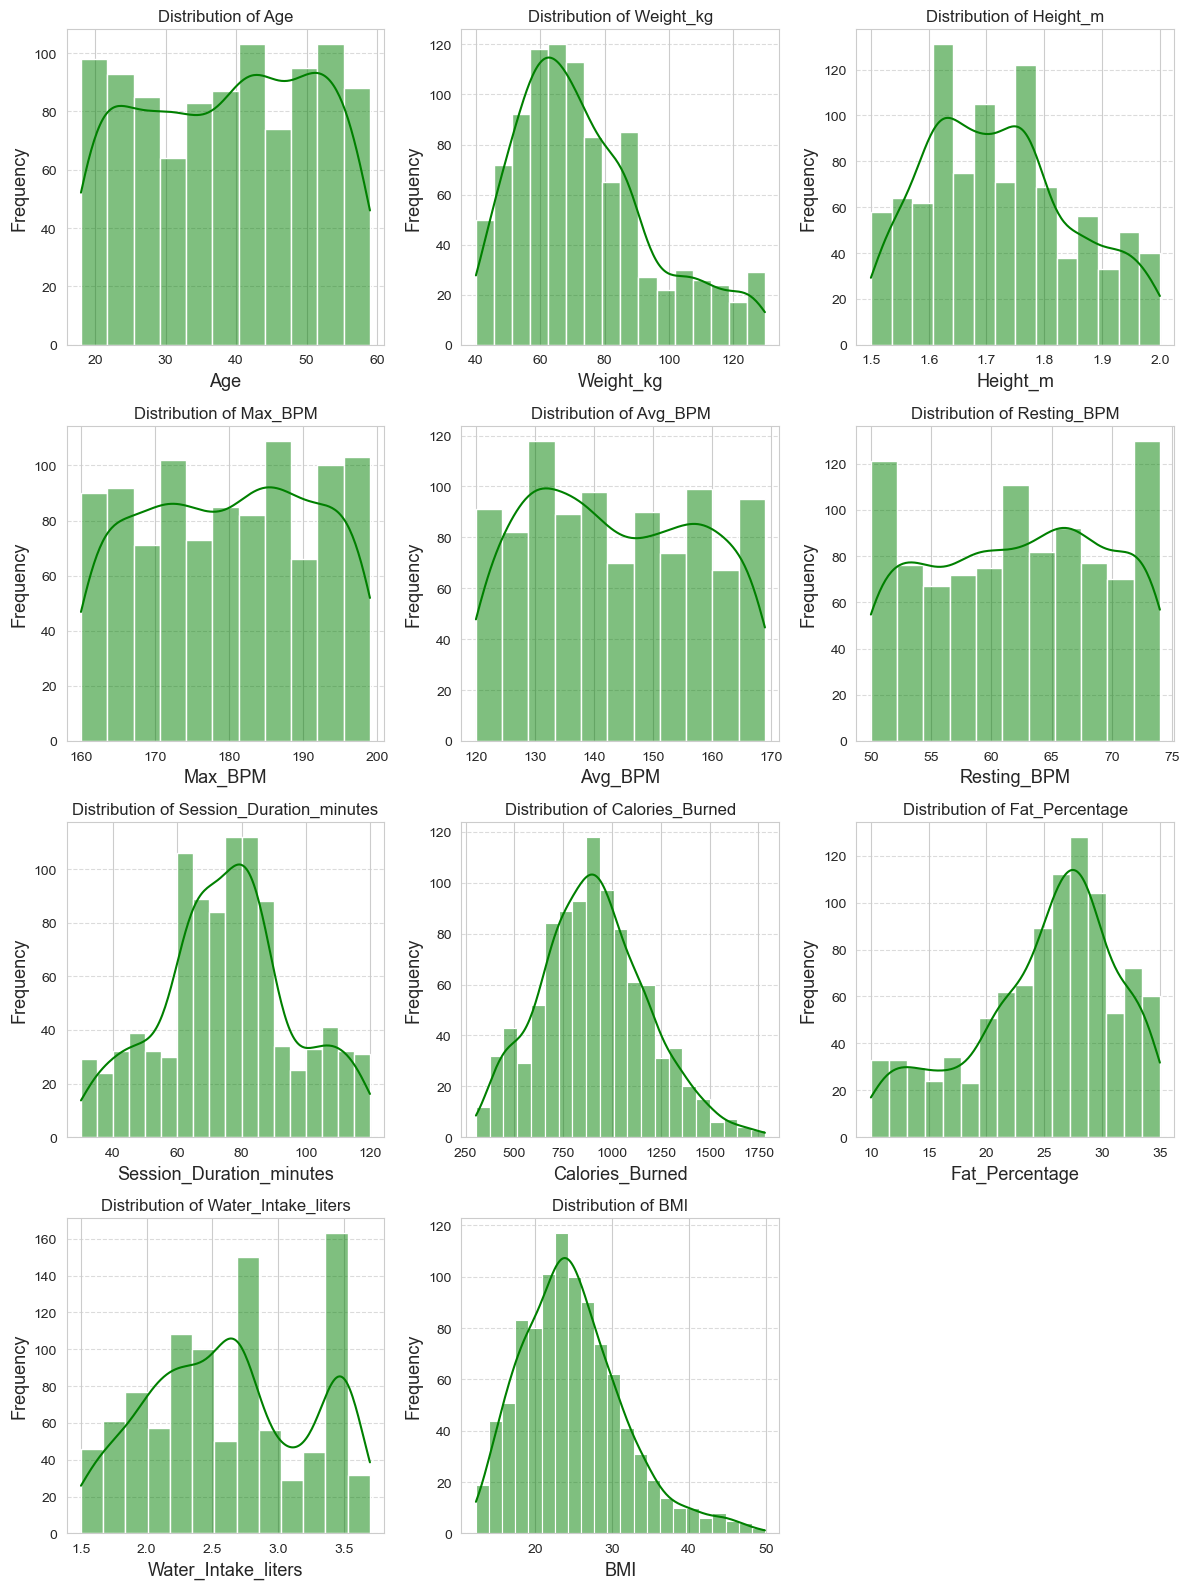

In [7]:
# Histogramas

# numerical cols w/o Workout_Frequency_per_week and Experience_Level, because there are few classes.
exclude = ['Workout_Frequency_days_per_week', 'Experience_Level']
numerical2 = [col for col in numerical if col not in exclude]

n_cols = 3
n_rows = (len(numerical2) + n_cols - 1) // n_cols # Ensure enough rows for all features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten() # Flatten axes array for easy indexing

# Loop for each numerical feature and plot
for i, col in enumerate(numerical2):
    sns.histplot(data[col], kde=True, color='green', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Frequency', fontsize=13)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if number of columns isn't even
for j in range(i +1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# NOTES FROM HISTOGRAM PLOTS

Demographic variables:

+ Age: The age distribution appears as a multimodal histogram with a large proportion of people aged 40.

+ Weight: The distribution is skewed to the right, indicating people with lower weights in the majory.

+ Height: It is a bimodal distribution with two concentrations at 1.6 metres and 1.75 metres.

Workout metrics

+ Session duration (minutes): It indicates the session duration in the majority of trainings sessions are close to 80 minutes.

+ Calories burned: The majority of people tend to burm the same amount of calories.

+ Fat percentage: The distribution is skewed to the left, indicating people with a higher body fat percentage.

+ Water intake: Water intake distribution shows that people drink almost 2.5 and 3.5 litres of water during the training session.

Physiological metrics

BPM: It is the heart rate.

+ Max BPM: a bimodal distribution wiht two concentrations in 170 and 185 BPM.

+ BMI: The distribution is skewed to the right, with a large proportion of people with lower BMIs.

+ Resting BPM: The distribution is relatively symmetrical, indicating members with lower average heart rate.

c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

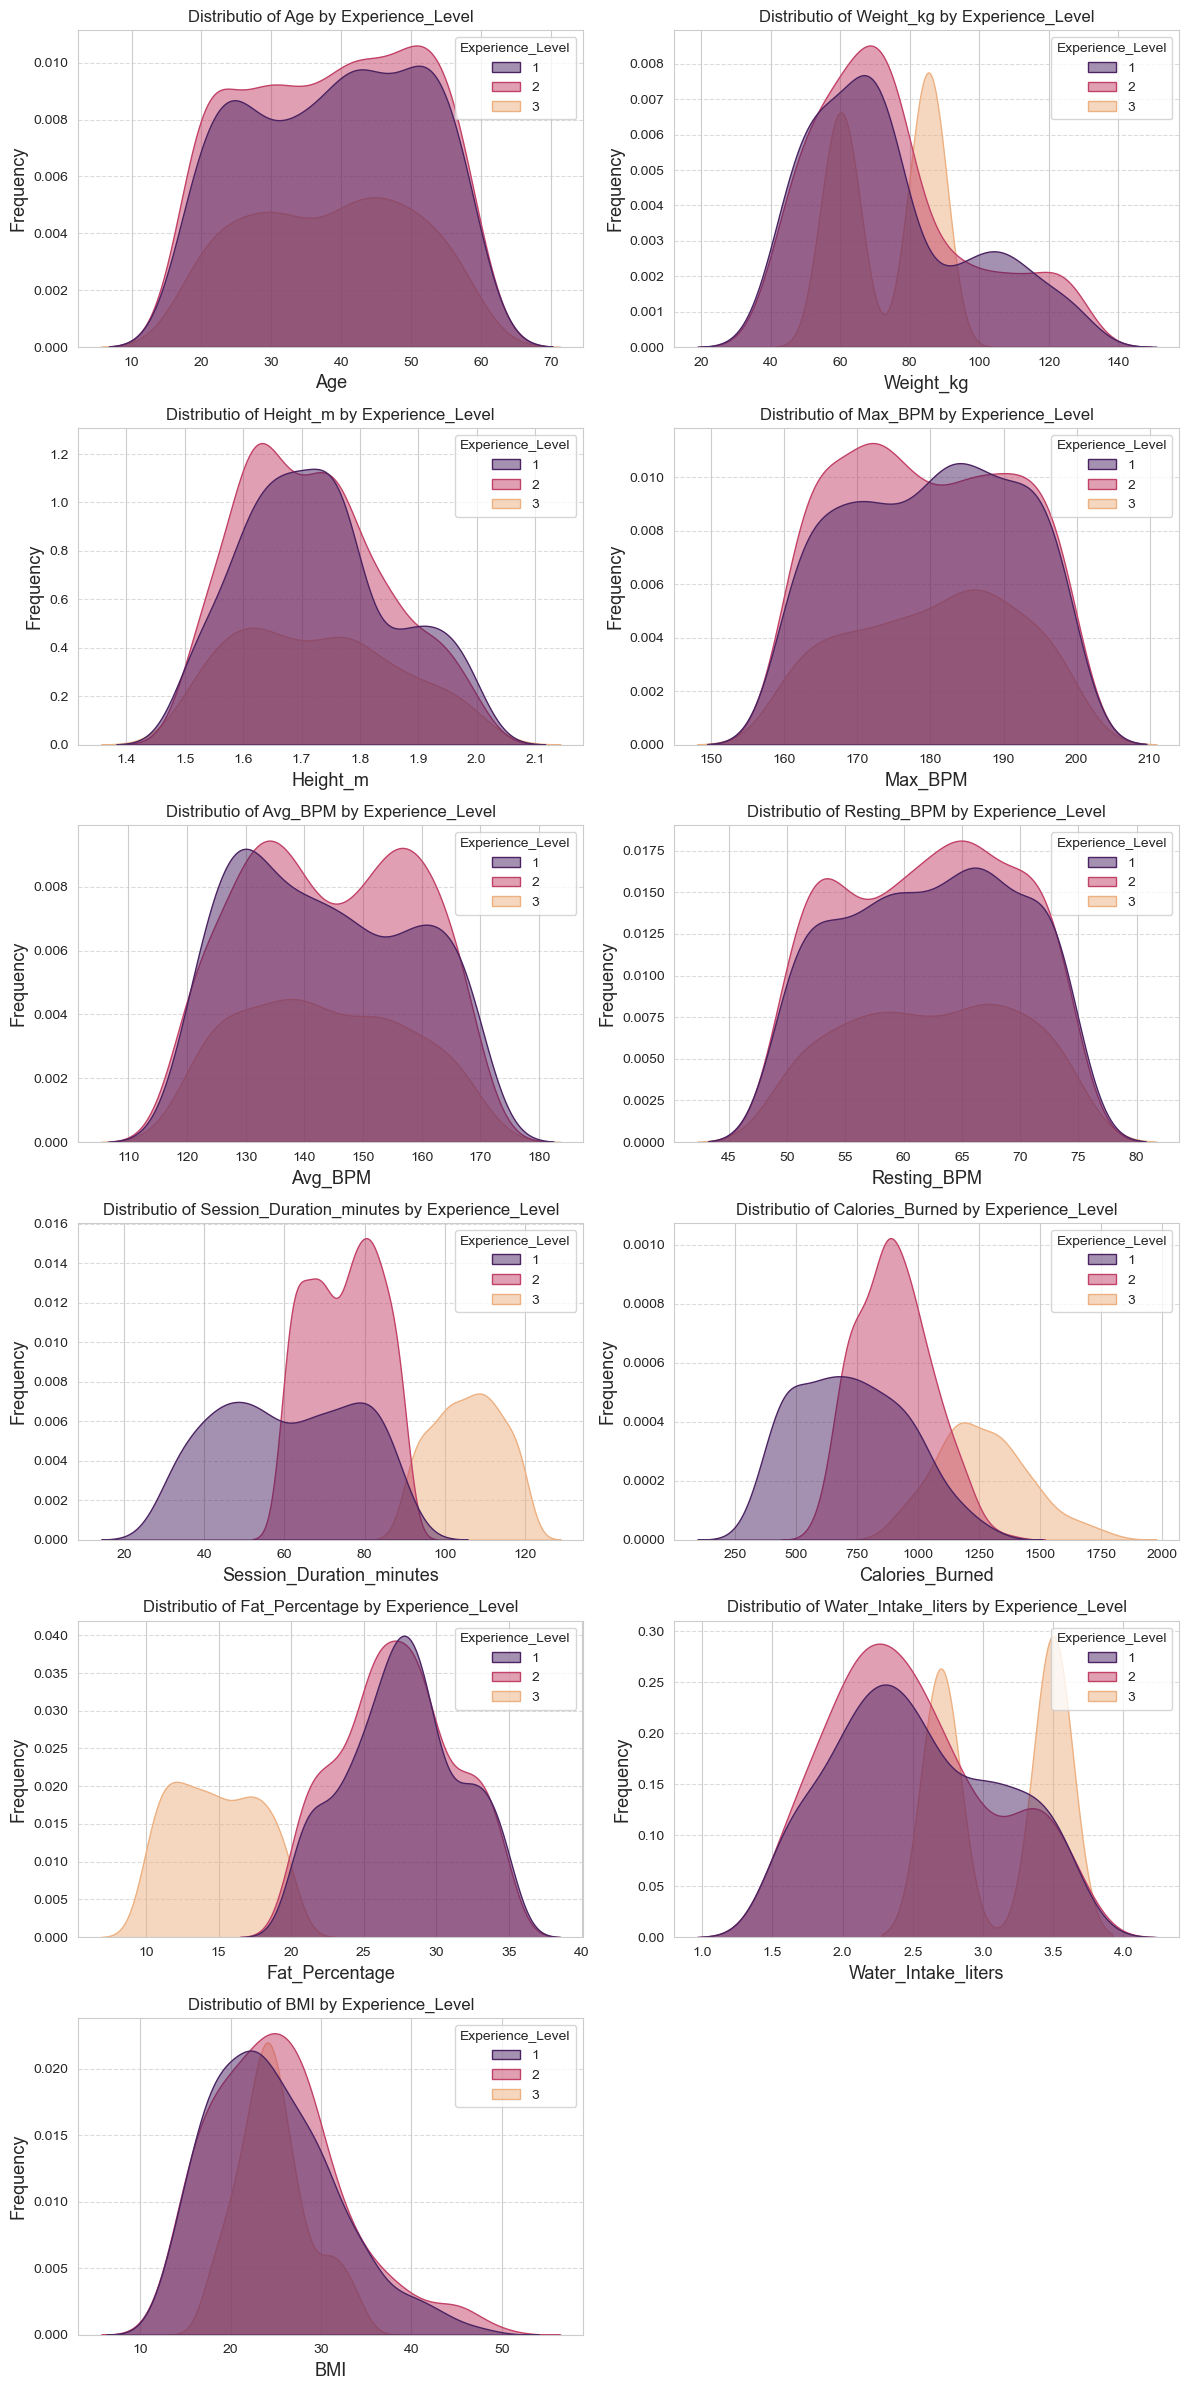

In [8]:
# Histogram segmented by experience level

exclude2 = ['Gender', 'Experience_Level', 'Workout_Frequency_days_per_week']
numerical3 = [col for col in numerical if col not in exclude2]

n_cols = 2
n_rows = (len(numerical3) + n_cols - 1) // n_cols # Ensure enough rows for all features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten() # Flatten axes array for easy indexing

for i, col in enumerate(numerical3):
    sns.kdeplot(data, x=col, hue=exclude2[1], palette="flare_r", ax=axes[i], fill=True, alpha=0.5)
    axes[i].set_title(f'Distributio of {col} by {exclude2[1]}')
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Frequency', fontsize=13)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if number of columns isn't even
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# NOTES FROM KDE (Kernel Density Estimate) PLOTS

Demographic variables

+ Age: People aged 40 or over tend to have less experience, while those with level 3 experience tend to be closer to 30 and 45.

+ Weight: Beginners tend to have lower body weight while experienced members are divided into two body weight groups, suggesting that members with high experience are relatively independent of experience.

+ Height: The majority of members tend to bo 1.7m tall, but there is no clear relationship between the height and the experience.

Workout metrics

+ Session Duration: For members with an experience level of 2, there is a relationship between the session duration and the experience; for beginners there is no a clear relationship, as the distribution for an experience level of 1, is bimodal.

+ Calories Burned: For each experience level, it is clear that as the experience increases, the calories burned will also increase.

+ Fat percentage: For members with experience levels between 1 and 2, have a relationship between fat percentage and the experience,although as the experience increases, the fat percentage tends to decrease, but in general there is no a clear correlation between the body fat percentage and the experience level.

+ Water intake: There is no a clear relationship between water intake and the experience level.

Physiological metrics

+ Max BPM: Members with higher experience levels tend to have a higher maximum heart rate than those with lower experience levels.

+ Avg BPM: Members with higher experience levels tend to have a 
lower average heart rate than members with experience levels of 1 and 2, but, there is no a clear relationship between average BPM and experience level.

+ Resting BPM: There is no a clear pattern between resting heart rate and experience level.

Conclusions:

+ Experience levels can be related to parameters such as Fat perecentage, calories burned, Max BPM, etc.

+ Members with experience levels of 1 and 2, tend in general to have the same distribution.

+ The data suggests that there are variables that are correlated between them, and an increase or decrease in one could affect the other, which could mean an improvement in their fitness levels.


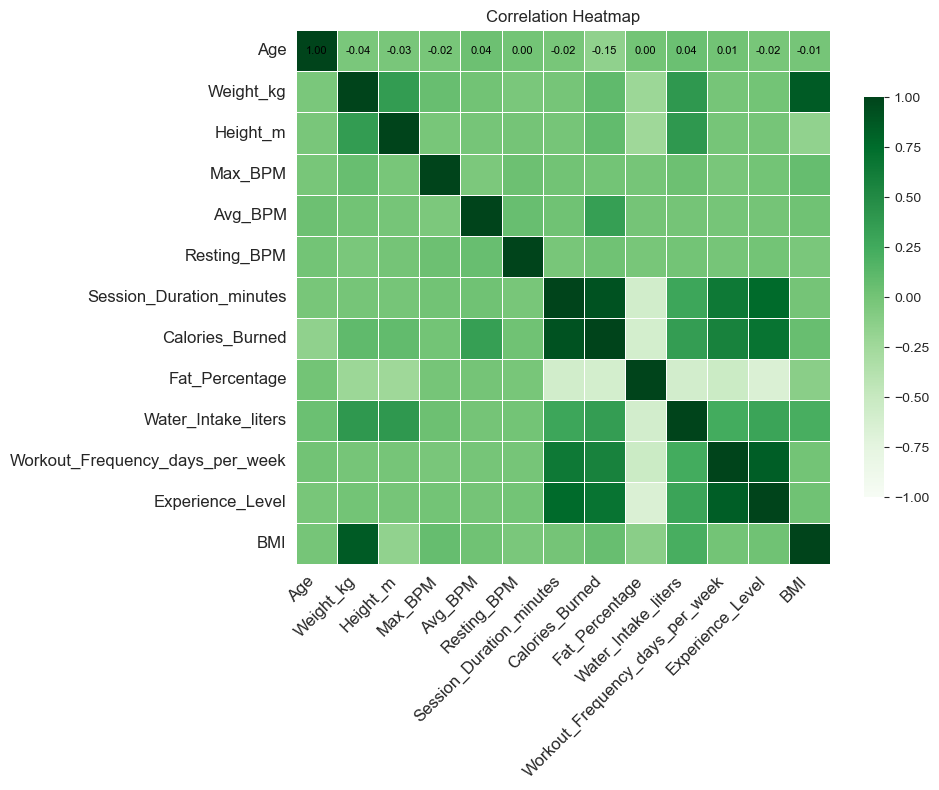

In [110]:
# Create a numerical dataframe
numerical_df = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='Greens',
    vmin=-1,
    vmax=1,
    center=0,
    annot_kws={'size':8, 'color': 'black'},     # Labels
    fmt='.2f',   # format to limit values to 2 decimals
    linewidths=.5, # borders betweem cells
    cbar_kws={"shrink": 0.75},
    square=True
)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

# NOTES FROM HEATMAP PLOT

The correlation heatmap provides a visual representation of the correlation between the variables in the dataset, with higher correlations associated with dark colours and lower correlations associated with light colours.

*Some positive correlations*

+ Weight and Height: There is a strong positive correlation between height and weight, indicating that taller individuals tend weigh more.

+ Weight and Water intake: There is a strong positive correlation between the weight and the amount of water consumed during the exercise; with heavier people tending to drink more water.

+ Weight and BMI: There is a strong positive correlation between weight and BMI, with heavier people tending to have a higher BMI.

+ Session duration and Calories burned: There is a strong positive correlation between the calories burned and the session duration, indicating that longer workouts burn more calories.

+ Experience level and Session duration: People with more experience tend to have more extensive training sessions.

+ Calories burned and Experience level: As more experienced members tend to have more extensive workouts, the calories burned wil be higher.

*Some positive correlations*

+ Fat percentage and Workout frequency: There is a negative correlation, which means that the more workout session a person has, the less body fat they will have.

+ The Fat percetange has a strong negative correlation with session duration, calories burned and experience level.

*Observations*

+ Water intake has a weak or no correlation with most other variables, suggesting that this variable is not associated with other factors in the dataset.

+ Age is other variable with weak or no correlations with others workout metrics, suggesting that age does not have a strong influence on exercise habits.


The following are some scatters plots. The show variables that are strongly correlated.

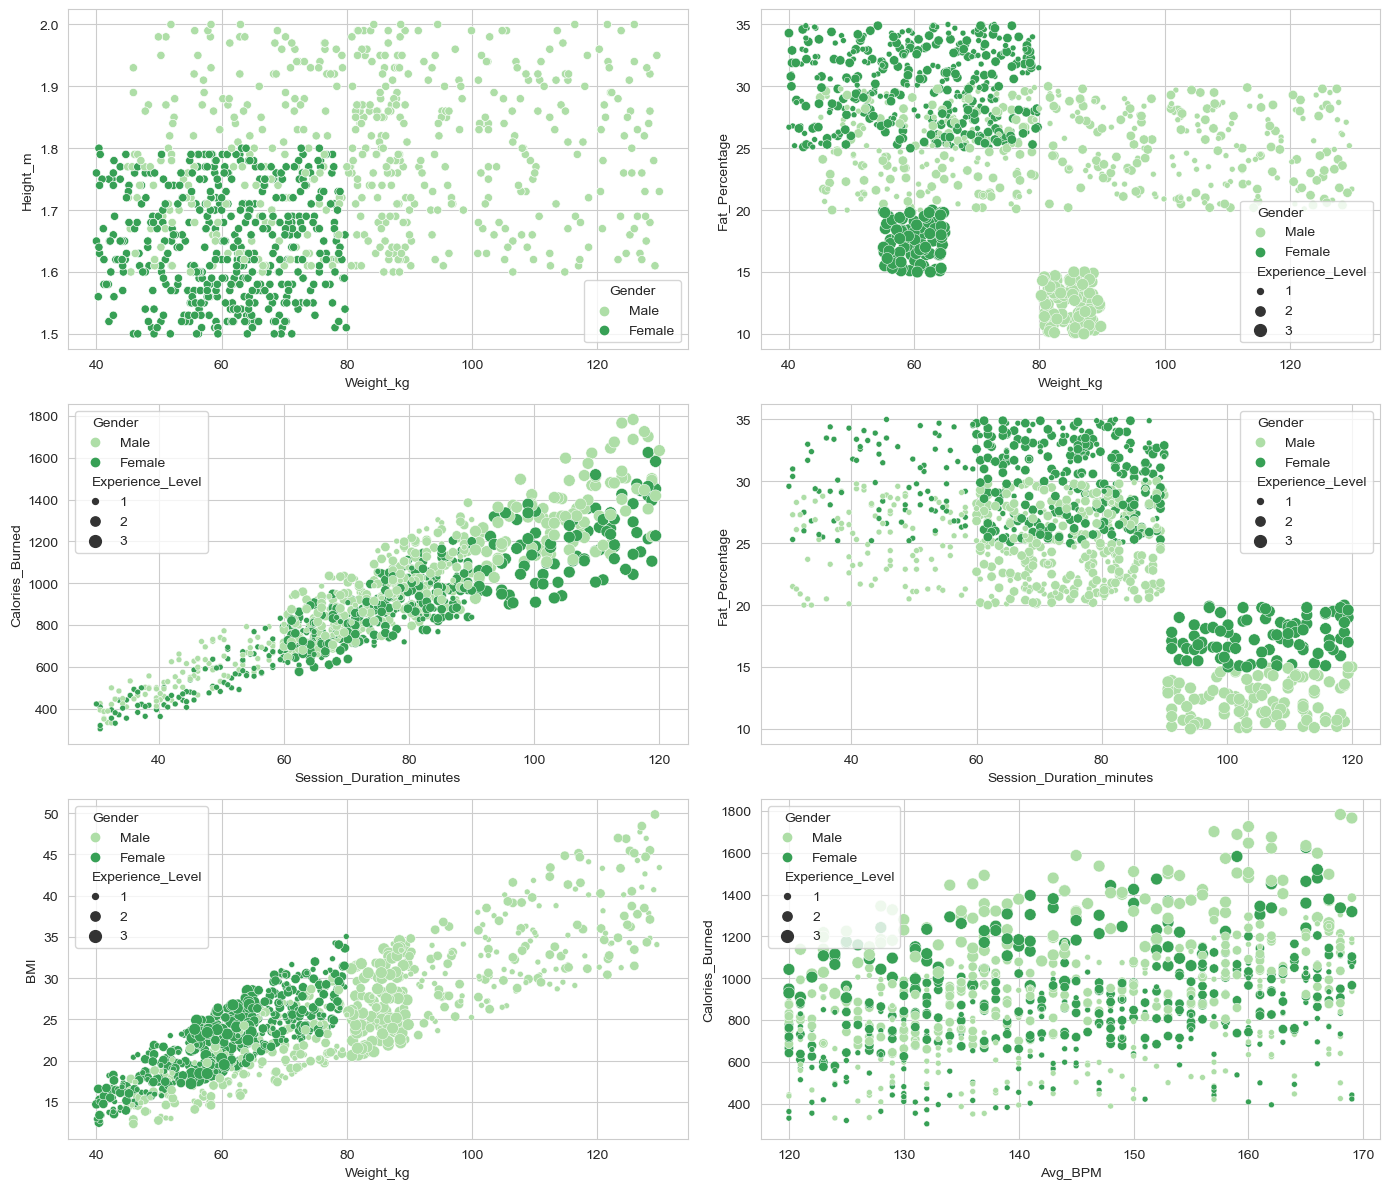

In [49]:
# Pad
fig, axes = plt.subplots(
    3, 2,
    figsize=(14,12),
    gridspec_kw={'width_ratios':[1,1]}
)

# Weight vs Height
sns.scatterplot(ax=axes[0][0],     data=data,    x='Weight_kg',    y='Height_m',    hue='Gender',    palette='Greens')

# Session duration vs Calories burned
sns.scatterplot(    ax=axes[1][0],    data=data,    x='Session_Duration_minutes',    y='Calories_Burned',    hue='Gender',  size='Experience_Level',  palette='Greens',    marker='o') 

# Weight vs BMI
sns.scatterplot(    ax=axes[2][0],    data=data,    x='Weight_kg',    y='BMI',    hue='Gender', size='Experience_Level',    palette='Greens',    marker='o')

# Weight vs Fat percentage
sns.scatterplot(    ax=axes[0][1],    data=data,    x='Weight_kg',    y='Fat_Percentage',    hue='Gender',  size='Experience_Level',  palette='Greens',    marker='o') 

# Session duration vs Fat percentage
sns.scatterplot(    ax=axes[1][1],    data=data,    x='Session_Duration_minutes',    y='Fat_Percentage',    hue='Gender', size='Experience_Level',   palette='Greens')

# Avg BPM vs Calories burned
sns.scatterplot(    ax=axes[2][1],    data=data,    x='Avg_BPM',    y='Calories_Burned',    hue='Gender', size='Experience_Level',   palette='Greens')

plt.tight_layout()
plt.show()

Scatter plots provide a visual representation of the relationship between two variables, but in this case, segmented by the gender and experience level, which helps to analyse how the fitness metrics are strongly related to the experience in the fitness world.